# PROBLEM STATEMENT

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [3]:
##from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#dataset_train=pd.read_csv('/content/drive/MyDrive/week6/Classification Datsets/Classification Datsets/Bank Client Deposit Data set Classification/Bank Client Deposit Data set Classification.csv')

In [5]:
dataset_train=pd.read_csv("/content/Bank Client Deposit Data set Classification.csv")

In [6]:
dataset_train.shape

(45211, 17)

In [7]:
dataset_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
dataset_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
dataset_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
dataset_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [11]:
dataset_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [12]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


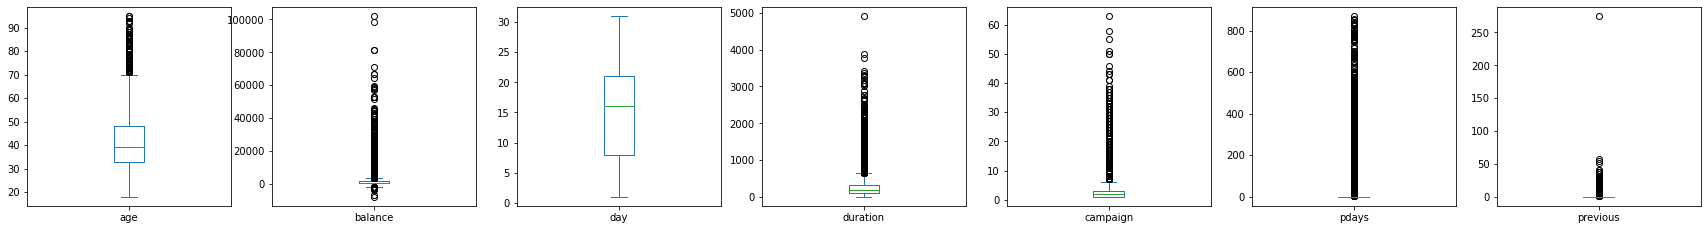

In [13]:
dataset_train.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()
     

In [14]:
obj = (dataset_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset_train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Categorical variables: 10
Integer variables: 7


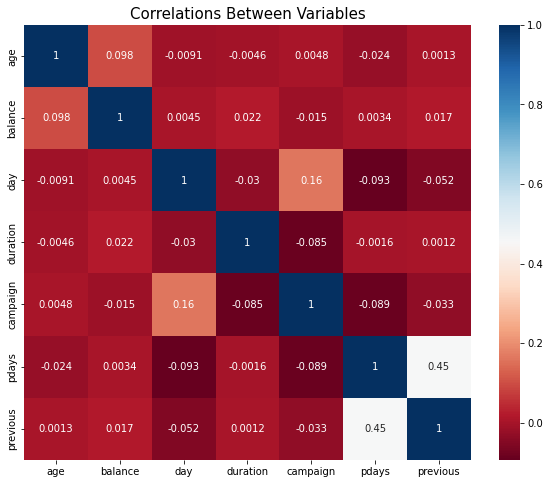

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset_train.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() 

In [16]:
num=dataset_train._get_numeric_data() 
num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [17]:
dataset_train.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [18]:
cat=dataset_train.drop(num,axis=1)
cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [19]:
df=dataset_train.drop(['age','job','education','day'], axis=1)
df

,marital,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,married,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,single,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no
2,married,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,married,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,no
4,single,no,1,no,no,unknown,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,married,no,825,no,no,cellular,nov,977,3,-1,0,unknown,yes
45207,divorced,no,1729,no,no,cellular,nov,456,2,-1,0,unknown,yes
45208,married,no,5715,no,no,cellular,nov,1127,5,184,3,success,yes
45209,married,no,668,no,no,telephone,nov,508,4,-1,0,unknown,no


In [20]:
cat=dataset_train.drop(num,axis=1)
cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [21]:
dataset_train['marital'].unique() 

array(['married', 'single', 'divorced'], dtype=object)

In [22]:
dataset_train['default'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df["y"] = df["y"].replace({"no": 0, "yes": 1})

In [24]:

# Convert categorical columns into dummy variables
cat_cols = ['marital','default','housing','loan','contact','month','poutcome']
df_dummies = pd.get_dummies(dataset_train[cat_cols], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(columns=cat_cols, inplace=True)

# Print the updated dataframe
df.head()


,balance,duration,campaign,pdays,previous,y,marital_married,marital_single,default_yes,housing_yes,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,2143,261,1,-1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,29,151,1,-1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,76,1,-1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1506,92,1,-1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,198,1,-1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
df.shape

(45211, 27)

In [26]:

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [27]:
num = ['balance','duration','campaign','pdays','previous']
X_train_num = df[num]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train_num)

# Scale the numerical features in the training set
df[num] = scaler.transform(X_train_num)


In [28]:
# Separate the target variable from the input features
y = df['y']
X = df.drop('y', axis=1) #axis=1 the operation is performed along the columns

In [29]:
# Split the data into training and test sets
train_size = int(len(dataset_train) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 31647
test data: 13564


In [30]:
X_train.shape

(31647, 26)

In [31]:
## Model building for rfc without using sklearn library

import numpy as np
from collections import Counter    ## Counter class from the collections module is a useful tool for counting the frequency of elements in a list or any other iterable.

class Node:
  ##the feature, threshold, left, and right parameters define an internal node, and the value parameter defines a leaf node.
  ## The * before the value parameter indicates that it is a keyword-only argument, which means it can only be passed using its name.
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None): ## init is a method used to initialise the obj of a class.
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
 ## is_leaf_node is a member function of a class.is_leaf_node method is used to check if a particular node is a leaf node or not.
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

##fit is a member function of a class. x--i/pfeatures, y--target var
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

##The _grow_tree method is a recursive method that creates the decision tree by splitting the input data at each node based on the selected feature and threshold
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)     ##np.random.choice() is a func from the NumPy lib that randomly selects a specified no.of items

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


##_best_split that takes in an input dataset X, a target variable y, and a set of feature indices feat_idxs. 
##The purpose of this method is to find the best split point among all the candidate features and thresholds for a given set of features,
  
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:  ##feat_idxs is a numerical position of each of these feature in dataset
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


### method _information_gain that takes in a target variable y, a feature column X_column, and a threshold value.
## The purpose of this method is to calculate the information gain of a given split point based on the entropy of the parent node and the weighted average entropy of the child nodes.

  
    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        ##the method splits the data into left and right child nodes based on the specified threshold. 
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        ##Finally, the method calculates the information gain as the difference between the parent entropy and the child entropy.  
        information_gain = parent_entropy - child_entropy
        return information_gain

## The method first uses NumPy's argwhere function to find the indices of the samples in X_column that are less than or equal to the split threshold.
## The flatten method is then used to convert the resulting 2D array of indices to a 1D array.
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)  ##bincount function to count the number of occurrences of each class label in y.
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [32]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):   ## initializes the hyperparameters of the random forest classifier
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_features
        self.trees = []

    def fit(self, X, y):   ##  This method is used to train the random forest classifier. It creates a list of decision trees by calling the DecisionTree class, 
                                #then fits each decision tree on a bootstrapped sample of the training data.
                              # The number of trees to be created is defined by the n_trees hyperparameter
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):  ## It takes in the training data X and corresponding labels y, and returns a bootstrapped sample of the same size as the original data
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):  ## takes in an array of labels y and returns the most commonly occurring label.
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):  ##used to make predictions on new data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
rf = RandomForest(n_trees=100,max_depth=2,n_features=2)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=200)

In [43]:
y_pred = rf.predict(X_train)

In [44]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [45]:
## checking accuracy_score

accuracy = accuracy_score(y_train.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [46]:
rf.fit(X_test, y_test)

RandomForestClassifier(max_features=1, n_estimators=200)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [49]:
## checking accuracy_score

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
import itertools

def grid_search(param_grid, model, X_train, y_train, X_test, y_test):
    best_score = None
    best_params = None
    
    # Generate all possible combinations of hyperparameters
    all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]
    
    # Loop over all parameter combinations and fit the model
    for params in all_params:
        model.set_params(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        # Update best score and parameters if this model is better
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
    
    return best_score, best_params


In [51]:
#  Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [52]:
#  Create an RFC model
rfc = RandomForestClassifier()


In [53]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [54]:
# Step 5: Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.95


In [55]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [56]:
# Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.85
